In [49]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100


In [51]:
import stratosphere

In [52]:
from stratosphere import Stratosphere

In [56]:
s = Stratosphere("sqlite:///../stratosphere.db")

In [57]:
!du -h ../stratosphere.db

 13M	../stratosphere.db


In [58]:
q = """
select * from responses
"""
s.db.pandas(q).columns

Index(['id_response', 'flow_request_pretty_url', 'flow_request_http_version',
       'flow_request_headers', 'flow_request_header_content_type',
       'flow_request_content', 'flow_request_text',
       'flow_request_timestamp_start', 'flow_response_status_code',
       'flow_response_http_version', 'flow_response_headers',
       'flow_response_header_content_type', 'flow_response_content',
       'flow_response_text', 'flow_response_timestamp_start'],
      dtype='object')

In [59]:
q = """
select count(*) from responses
"""
s.db.pandas(q)

,count(*)
0,68


In [60]:
import json

q = """
select LOWER(flow_response_headers) as flow_response_headers from responses 
"""
s.db.pandas(q).flow_response_headers.apply(json.loads).apply(lambda d: d.keys()).explode().value_counts()[:10]

cache-control             68
x-li-pop                  68
date                      68
x-cache                   68
x-li-uuid                 68
x-li-proto                68
x-li-fabric               68
content-length            67
x-content-type-options    66
content-type              64
Name: flow_response_headers, dtype: int64

In [61]:
import json

q = """
select LOWER(flow_request_headers) as flow_request_headers from responses 
"""
s.db.pandas(q).flow_request_headers.apply(json.loads).apply(lambda d: d.get('content-type')).value_counts()

text/plain;charset=utf-8             30
application/x-www-form-urlencoded     2
application/json; charset=utf-8       1
Name: flow_request_headers, dtype: int64

In [62]:
import json

q = """
select LOWER(flow_response_headers) as flow_response_headers from responses 
"""
s.db.pandas(q).flow_response_headers.apply(json.loads).apply(lambda d: d.get('content-type')).value_counts()

text/plain; charset=utf-8                                      26
image/jpeg                                                     25
application/vnd.linkedin.normalized+json+2.1; charset=utf-8     5
video/mp4                                                       4
image/svg+xml                                                   2
text/vtt                                                        1
application/json                                                1
Name: flow_response_headers, dtype: int64

In [63]:
import json

q = """
select flow_response_header_content_type from responses
"""
s.db.pandas(q).flow_response_header_content_type.value_counts()

text/plain; charset=utf-8                                      26
image/jpeg                                                     25
application/vnd.linkedin.normalized+json+2.1; charset=UTF-8     5
video/mp4                                                       4
image/svg+xml                                                   2
text/vtt                                                        1
application/json                                                1
Name: flow_response_header_content_type, dtype: int64

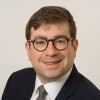

In [67]:
import json

q = """
select flow_response_content from responses where LOWER(flow_response_header_content_type) = 'image/jpeg' 
order by random()
"""

from PIL import Image
import io

image_data = s.db.pandas(q).flow_response_content.iloc[0]
image = Image.open(io.BytesIO(image_data))
display(image)

In [46]:
q = """
SELECT *
FROM responses
WHERE flow_request_pretty_url LIKE "%linkedin%"
    AND flow_response_text LIKE '%{%"%}%'
ORDER BY RANDOM()
LIMIT 2
"""
s.db.pandas(q)

,id_response,flow_request_pretty_url,flow_request_http_version,flow_request_headers,flow_request_header_content_type,flow_request_content,flow_request_text,flow_request_timestamp_start,flow_response_status_code,flow_response_http_version,flow_response_headers,flow_response_header_content_type,flow_response_content,flow_response_text,flow_response_timestamp_start


In [47]:
q = """
SELECT *
FROM responses
WHERE LOWER(flow_response_text) LIKE "%alessandro%" 

"""

s.db.pandas(q)


,id_response,flow_request_pretty_url,flow_request_http_version,flow_request_headers,flow_request_header_content_type,flow_request_content,flow_request_text,flow_request_timestamp_start,flow_response_status_code,flow_response_http_version,flow_response_headers,flow_response_header_content_type,flow_response_content,flow_response_text,flow_response_timestamp_start


In [ ]:
q = """
SELECT *
FROM responses
WHERE flow_request_pretty_url LIKE "%https://www.linkedin.com/voyager/api/graphql%"
"""

import json

data = json.loads(s.db.pandas(q).flow_response_text.iloc[0])
data.keys()

